<font size="5">**MRB data analyse**<font>

<font size="3">First, we load important libraries.<font>

In [6]:
import os
import keyfi as kf
from keyfi.dimred import TSNE
from keyfi.cluster import KMeans

<font size="3">Load vtk data of the MRB in this path:<font>

In [7]:
path_input  = './input/2DMRB.vtk'
data, mesh = kf.import_vtk_data(path_input)

<font size="3">Clean data and only keep the temperature T and 17 species, these are also the input to CEMA analyse for comparison:<font>

In [8]:
cleaned_data = kf.clean_data(data, dim=2, vars_to_drop=None, 
vars_to_keep=['T', 'H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'CH2', 'CH2S', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'N2']
)

In [9]:
print ("data length N = {}\n".format(len(cleaned_data)))
print (cleaned_data.describe())

data length N = 70951

                  T            H2             H             O            O2  \
count  70951.000000  7.095100e+04  7.095100e+04  7.095100e+04  70951.000000   
mean    1201.693848  7.142781e-05  1.151170e-05  1.988698e-04      0.120411   
std      695.951721  1.552306e-04  3.476686e-05  4.076611e-04      0.080185   
min      302.999176  0.000000e+00  0.000000e+00  0.000000e+00      0.014531   
25%      332.883057  2.518204e-08  1.054987e-16  4.439970e-13      0.048136   
50%     1596.588135  1.018075e-05  2.899334e-07  3.018385e-05      0.067881   
75%     1843.843750  6.129315e-05  3.467945e-06  1.645271e-04      0.211072   
max     2078.481934  1.397522e-03  3.398931e-04  2.499236e-03      0.234456   

                 OH           H2O           HO2           CH2          CH2S  \
count  7.095100e+04  70951.000000  7.095100e+04  7.095100e+04  7.095100e+04   
mean   8.057848e-04      0.057214  9.647544e-06  3.450537e-07  2.457472e-08   
std    1.103116e-03      0.0

<font size="3">Now, let's set hyperparameters to examine the performance of t-SNE algorithm in mapping high-dimensional data onto low dimensional.<font>

<font size="3">We focus on the perplexity and set other parameters to be the default in scikit-learn.<font>

In [10]:
perplexity         = [1280] #[40, 80, 160, 320, 640, 1280, 1920, 2560, 3200]
early_exaggeration = [12]
learning_rate      = [200]
trade_off_angle    = [0.5]

<font size="3">Note, the perplexity can be given in a list which will be looped through in the following for dimensional reduction. We choose to use *'1280'* to show the result.<font>

<font size="3">The scaler can be *'MaxAbsScaler'*, *'StandardScaler'*, or *'MinMaxScaler'*.<font>
<font size="3">The feature can be *'All'* or any specific variable on which we would like to apply the scaler.<font>

<font size="3">Here, we choose *'MinMaxScaler'* applied on feature *'T'*, this is because the temperature is large comparing to mass fraction of other species ranging from 0-1. It's good to also scale T to the same range.<font>

In [11]:
save_dir = './output/embedding/'
os.makedirs(save_dir, exist_ok = True)

<font size="3">We set the save_dir for saving the low-dimensional *'embedding'*, followed by creating the directory if it doesn't exist.<font>

<font size="3">We can initialize the points layout using either *'pca'*, *'random'*, or *'array'*. The *'array'* is a special treatment is the current version. Basically it is the same as 'pca' which is a default one in scikit-learn, except that the *'svd_solver'* is set as *'full'* and *'random state'* in PCA initialization is set as *'0'*.<font>

In [12]:
for pp in perplexity:
    for ee in early_exaggeration:
        for lr in learning_rate:
            for ta in trade_off_angle:
                print ("Date reduction using \n pp = {}, ee = {}, lr = {}, ta = {}\n".format(pp, ee, lr, ta))
                embedding, mapper = kf.embed_data(data=cleaned_data, 
                                                    algorithm=TSNE, 
                                                    scale=True,
                                                    scaler='MinMaxScaler',
                                                    feature='T',
                                                    n_components=3,
                                                    perplexity=pp, 
                                                    early_exaggeration=ee, 
                                                    learning_rate=lr,
                                                    n_iter=1000, 
                                                    angle=ta, 
                                                    init="array",
                                                    random_state = 0,
                                                    n_jobs=16)
                                      
                kf._save_emdedding(embedding = embedding, embedding_name = 'embedding' + 'pp{}ee{}lr{}ta{}'.format(pp, ee, lr, ta), embedding_path = save_dir + 'tsne/')

Date reduction using 
 pp = 1280, ee = 12, lr = 200, ta = 0.5

Apply scaling for single feature T

Data reduction using algorithm: TSNE....

Initialization using init = 'array' obtained from PCA.

Explained variance: 0.9996 

Individual variance contributions:
0.9935891601148549
0.004355031330520764
0.0016942146820716946
done in 2429.042s.

Embedding data saved. 



<font size="3">We can plot the embeddings in either 2D or 3D t-SNE map. This is automatically detected by looking into the shape of the 'embedding'. <font>

<font size="3"><br>In our case, the embedding is 3D, so the t-SNE map is also 3D. We color the points using variables available in the *'cleaned_data'* by setting *'data=cleaned_data'*. Alternatively, it is also possible to set *'data=data'*, then more variables which are not cleaned can be used for coloring.<font>


<font size="3"><br>*'scale_points'*: decide whether to scale the size of scatter points for clearer visualizaiton. <font>
<font size="3"><br>*'cmap_var'*: specified the variable used to color the t-SNE map.<font>
<font size="3"><br>*'cmap_minmax'*: specifies the range of colormap.<font>


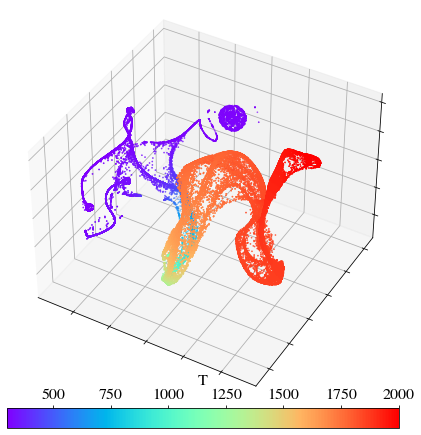

In [13]:
kf.plot_embedding(embedding = embedding, data = cleaned_data, 
                 scale_points = True, cmap_var='T', 
                 cmap_minmax = [300,2000], save = False, 
                 figname =  'Tembedding' + 'pp{}ee{}lr{}ta{}'.format(pp, ee, lr, ta),
                 figpath = save_dir + 'tsne/')

<font size="3">We use KMeans to cluster the points with cluster information returned to *'clusterer'*. <font>

In [14]:
clusterer = kf.cluster_embedding(embedding=embedding, 
                                 algorithm=KMeans, 
                                 n_clusters=10, 
                                 init='k-means++', 
                                 max_iter=300, 
                                 n_init=10,
                                 random_state = 0)

<font size="3">We plot the *'clustering'* in a cluster map.  <font>
    
<font size="3"><br>*'cluster_labels'*: specifies the labels of each cluster as found by the Kmeans algorithm.<font>
<font size="3"><br>*'embedding'*: contains the position of scatter points.<font>

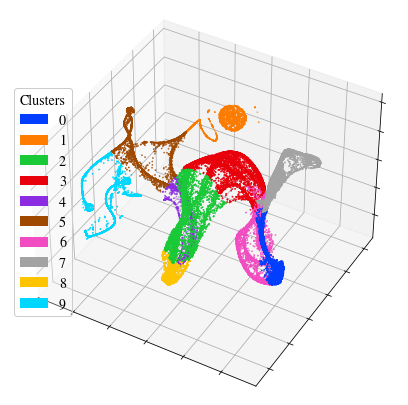

In [15]:
kf.plot_clustering(embedding=embedding, 
                   cluster_labels=clusterer.labels_,
                   save=False, 
                   figname='clusterKMEAN', 
                   figpath=save_dir + 'tsne/')

**As we note, the clusters are labelled and now we would like to use linear regression to find our relationship between the score and original data in high-dimension.**

**There are two choices here:**
1. We correlate the clusters to the high-dimensional data that is not scaled.
2. We correlate the clusters to the high-dimensional data scaled in the way as we do dimensional reduction.

**We choose method 1, so you can see the 'scale = False' as in below to get the cluster scores.**

**cluster_num = 1 means we get the score for cluster 1.**

**scores are then printed out by setting 'flag_print = True'**

In [16]:
cluster_scores = kf.get_cluster_scores(data=cleaned_data, 
                                       clusterer=clusterer, 
                                       embedding=embedding, 
                                       cluster_num = 1,
                                       scale = False,
                                       scaler='MinMaxScaler',
                                       feature='T',
                                       flag_print = True) 

Correlation Coefficient for cluster 1: 

   Variables Synthetic variables  Correlation Coefficient
0        CH4         Correlation                 0.571764
1      CH2OH         Correlation                -0.182651
2         H2         Correlation                -0.204985
3       CH2O         Correlation                -0.216294
4        CH3         Correlation                -0.218791
5         CO         Correlation                -0.219136
6        HCO         Correlation                -0.223118
7       CH2S         Correlation                -0.228976
8        CH2         Correlation                -0.232825
9        HO2         Correlation                -0.247062
10         H         Correlation                -0.248466
11        OH         Correlation                -0.301767
12       H2O         Correlation                -0.312203
13       CO2         Correlation                -0.314879
14         O         Correlation                -0.370810
15         T         Correlatio

**Here as you can see, we plot the bar chart based on that obtained above. This is for cluster 1 as well.**

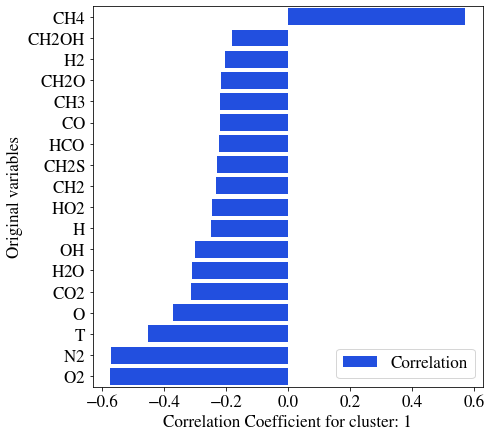

In [17]:
kf.plot_cluster_scores(cluster_scores, 
                       score_type = 'Linear', 
                       save = False, 
                       figname = 'scores_KMEAN', 
                       figpath = save_dir + 'tsne/')

**To map all scores back onto the LES map, we set cluster_num = 'All' to get all scores for vtk plot. Once you run the below command, you should see a pop-out window enabling to change the position of view. Once you choose to close it, the figure is plotted in this notebook. However, it is unclear yet why the pop-out window can't be closed properly, unless the entire jupyter notebook is closed.**

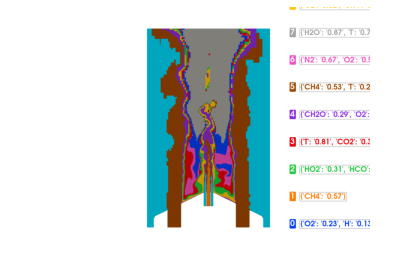

In [18]:
cluster_scores = kf.get_cluster_scores(data=cleaned_data, 
                                       clusterer=clusterer, 
                                       embedding=embedding, 
                                       cluster_num = 'All',
                                       scale = False,
                                       scaler='MinMaxScaler',
                                       feature='T',
                                       flag_print = False)    
kf.plot_vtk_data(mesh, cluster_scores, clusterer, soft=False, save = False, 
                figname = 'LESgrid', figpath = save_dir + 'tsne/')

**At the present, the LES map as show above is not perfect. Users are suggested to set save = 'True', so you save the figure of proper size in the tsne directory.**

**This tutorial will be updated regarding this incorrect view.**